**Jute Insect Classification with VGG19 Transfer Learning**


In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import os
import PIL
import tensorflow as tf
from skimage import io
from PIL import Image
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/drive/MyDrive/jute_insect_classification/insect_aug_data')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/drive/MyDrive/jute_insect_classification/insect_aug_data"))
file_count = len(files)
# print(file_count)

['Field Cricket', 'Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite', 'random_insect_data', 'test.csv']


In [ ]:
'''
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/jute insect classification/insect_aug_data'
base_dir = '/content/drive/MyDrive/insect_data_all'
os.mkdir(base_dir)'''

"\n# Make new base directory\noriginal_dataset_dir = '/content/drive/MyDrive/jute insect classification/insect_aug_data'\nbase_dir = '/content/drive/MyDrive/insect_data_all'\nos.mkdir(base_dir)"

In [ ]:
'''
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create four folders 
# (Jute Stem Weevil, Field Cricket, Yellow Mite, Spilosoma Obliqua)

train_Jute Stem Weevil_dir = os.path.join(train_dir, 'Jute Stem Weevil')
os.mkdir(train_Jute Stem Weevil_dir)

train_Field Cricket_dir = os.path.join(train_dir, 'Field Cricket')
os.mkdir(train_Field Cricket_dir)

train_Yellow Mite_dir = os.path.join(train_dir, 'Yellow Mite')
os.mkdir(train_Yellow Mite_dir)

train_Spilosoma Obliqua_dir = os.path.join(train_dir, 'Spilosoma Obliqua')
os.mkdir(train_Spilosoma Obliqua_dir)

#Under validation folder create four folders 
# (Jute Stem Weevil, Field Cricket, Yellow Mite, Spilosoma Obliqua)

validation_Jute Stem Weevil_dir = os.path.join(validation_dir, 'Jute Stem Weevil')
os.mkdir(validation_Jute Stem Weevil_dir)

validation_Field Cricket_dir = os.path.join(validation_dir, 'Field Cricket')
os.mkdir(validation_Field Cricket_dir)

validation_Yellow Mite_dir = os.path.join(validation_dir, 'Yellow Mite')
os.mkdir(validation_Yellow Mite_dir)

validation_Spilosoma Obliqua_dir = os.path.join(validation_dir, 'Spilosoma Obliqua')
os.mkdir(validation_Spilosoma Obliqua_dir)
'''

"\n#create two folders (train and validation)\ntrain_dir = os.path.join(base_dir, 'train')\nos.mkdir(train_dir)\n\nvalidation_dir = os.path.join(base_dir, 'validation')\nos.mkdir(validation_dir)\n\n#Under train folder create five folders \n# (cloud, folly, rainy, shine, sunrise)\n\ntrain_cloud_dir = os.path.join(train_dir, 'Jute Stem Weevil')\nos.mkdir(train_cloud_dir)\n\ntrain_foggy_dir = os.path.join(train_dir, 'Field Cricket')\nos.mkdir(train_foggy_dir)\n\ntrain_rainy_dir = os.path.join(train_dir, 'Yellow Mite')\nos.mkdir(train_rainy_dir)\n\ntrain_shine_dir = os.path.join(train_dir, 'Spilosoma Obliqua')\nos.mkdir(train_shine_dir)\n\n#Under validation folder create five folders \n# (cloud, folly, rainy, shine, sunrise)\n\nvalidation_cloud_dir = os.path.join(validation_dir, 'Jute Stem Weevil')\nos.mkdir(validation_cloud_dir)\n\nvalidation_foggy_dir = os.path.join(validation_dir, 'Field Cricket')\nos.mkdir(validation_foggy_dir)\n\nvalidation_rainy_dir = os.path.join(validation_dir, 'Ye

In [ ]:
'''
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)
        '''

'\ndef split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):\n    files = []\n    for filename in os.listdir(SOURCE):\n        file = SOURCE + filename\n        if os.path.getsize(file) > 0:\n            files.append(filename)\n        else:\n            print(filename + " is zero length, so ignoring.")\n\n    training_length = int(len(files) * SPLIT_SIZE)\n    valid_length = int(len(files) - training_length)\n    shuffled_set = random.sample(files, len(files))\n    training_set = shuffled_set[0:training_length]\n    valid_set = shuffled_set[training_length:]\n\n    for filename in training_set:\n        this_file = SOURCE + filename\n        destination = TRAINING + filename\n        copyfile(this_file, destination)\n\n    for filename in valid_set:\n        this_file = SOURCE + filename\n        destination = VALIDATION + filename\n        copyfile(this_file, destination)\n        '

In [ ]:
'''
JSW_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Jute Stem Weevil/'
TRAINING_JSW_DIR = '/content/drive/MyDrive/insect_data_all/train/Jute Stem Weevil/'
VALID_JSW_DIR = '/content/drive/MyDrive/insect_data_all/validation/Jute Stem Weevil/'

FC_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Field Cricket/'
TRAINING_FC_DIR = '/content/drive/MyDrive/insect_data_all/train/Field Cricket/'
VALID_FC_DIR = '/content/drive/MyDrive/insect_data_all/validation/Field Cricket/'

YM_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Yellow Mite/'
TRAINING_YM_DIR = '/content/drive/MyDrive/insect_data_all/train/Yellow Mite/'
VALID_YM_DIR = '/content/drive/MyDrive/insect_data_all/validation/Yellow Mite/'

SO_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Spilosoma Obliqua/'
TRAINING_SO_DIR = '/content/drive/MyDrive/insect_data_all/train/Spilosoma Obliqua/'
VALID_SO_DIR = '/content/drive/MyDrive/insect_data_all/validation/Spilosoma Obliqua/'
'''

"\nJSW_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Jute Stem Weevil/'\nTRAINING_JSW_DIR = '/content/drive/MyDrive/insect_data_all/train/Jute Stem Weevil/'\nVALID_JSW_DIR = '/content/drive/MyDrive/insect_data_all/validation/Jute Stem Weevil/'\n\nFC_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Field Cricket/'\nTRAINING_FC_DIR = '/content/drive/MyDrive/insect_data_all/train/Field Cricket/'\nVALID_FC_DIR = '/content/drive/MyDrive/insect_data_all/validation/Field Cricket/'\n\nYM_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Yellow Mite/'\nTRAINING_YM_DIR = '/content/drive/MyDrive/insect_data_all/train/Yellow Mite/'\nVALID_YM_DIR = '/content/drive/MyDrive/insect_data_all/validation/Yellow Mite/'\n\nSO_SOURCE_DIR = '/content/drive/MyDrive/jute insect classification/insect_aug_data/Spilosoma Obliqua/'\nTRAINING_SO_DIR = '/content/drive/MyDrive/insect_data_all/train/Spilosoma Obliqua/'\nVALI

In [ ]:
'''
import os
import random
from shutil import copyfile

split_size = .90

split_data(JSW_SOURCE_DIR, TRAINING_JSW_DIR, VALID_JSW_DIR, split_size)
split_data(FC_SOURCE_DIR, TRAINING_FC_DIR, VALID_FC_DIR, split_size)
split_data(YM_SOURCE_DIR, TRAINING_YM_DIR, VALID_YM_DIR, split_size)
split_data(SO_SOURCE_DIR, TRAINING_SO_DIR, VALID_SO_DIR, split_size)
'''

'\nimport os\nimport random\nfrom shutil import copyfile\n\nsplit_size = .90\n\nsplit_data(JSW_SOURCE_DIR, TRAINING_JSW_DIR, VALID_JSW_DIR, split_size)\nsplit_data(FC_SOURCE_DIR, TRAINING_FC_DIR, VALID_FC_DIR, split_size)\nsplit_data(YM_SOURCE_DIR, TRAINING_YM_DIR, VALID_YM_DIR, split_size)\nsplit_data(SO_SOURCE_DIR, TRAINING_SO_DIR, VALID_SO_DIR, split_size)\n'

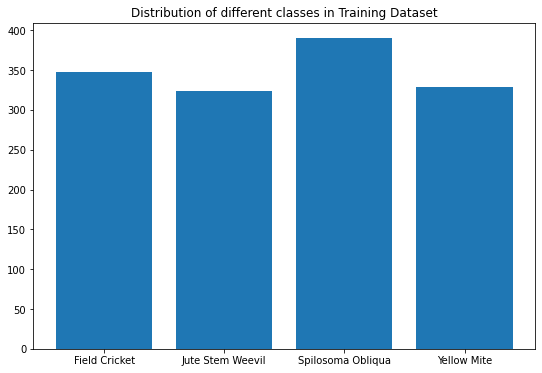

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = [ 'Field Cricket','Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/insect_data_all/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [6]:

for i in ['Field Cricket','Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/insect_data_all/train/'+i+'/'))))

Training Field Cricket images are: 347
Training Jute Stem Weevil images are: 324
Training Spilosoma Obliqua images are: 390
Training Yellow Mite images are: 329


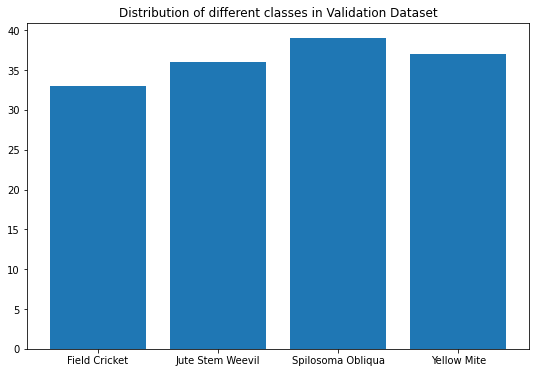

In [7]:
image_folder = [ 'Field Cricket','Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/insect_data_all/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [8]:
for i in [ 'Field Cricket','Jute Stem Weevil', 'Spilosoma Obliqua', 'Yellow Mite']:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/insect_data_all/validation/'+i+'/'))))

Validation Field Cricket images are: 33
Validation Jute Stem Weevil images are: 36
Validation Spilosoma Obliqua images are: 39
Validation Yellow Mite images are: 37


In [9]:
image_size=224
batch_size=64

In [10]:
TRAINING_DIR = '/content/drive/MyDrive/insect_data_all/train/'


train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(

    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    target_size=(image_size,image_size)
                                                    
                                                    )



Found 1390 images belonging to 4 classes.


In [11]:
VALIDATION_DIR = '/content/drive/MyDrive/insect_data_all/validation/'

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

validation_generator=validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              target_size=(image_size,image_size)
                                                              
                                                             )

Found 145 images belonging to 4 classes.


In [12]:
#Step 3. Deep Learning with Data Augumentation

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from glob import glob
from tensorflow import keras

In [13]:
#in vgg19, image size must be 224*224
image_size=[224,224]
vgg=VGG19(input_shape=image_size+[3], weights='imagenet', include_top=False)
vgg.output

80150528/80134624 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [14]:
#we will not going to train vgg layers
for layer in vgg.layers:
    layer.trainable=False

In [15]:
#to make the vgg16 recognise our dataclass from folders/directory
folders=glob(r"/content/drive/MyDrive/insect_data_all/train/*")
folders=glob(r"/content/drive/MyDrive/insect_data_all/validation/*")
print(len(folders))

4


In [16]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x) #we can add more dense layer in here to increase accuracy #Softmax computes the probability that the input belongs to a particular class, for each class. The values in each row summate to 1 – or 100%, which is a characteristic of a valid probability distribution.
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
#model_train
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) #loss='binary/sparse_crossentropy'
#cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

epochs=15

history= model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=epochs,
                  validation_data=validation_generator,
                 )
                
"""model.fit(train_generator,epochs=4,validation_data=validation_generator)"""

Epoch 1/15
22/22 [==============================] - 677s 30s/step - loss: 1.6677 - accuracy: 0.4482 - val_loss: 0.7012 - val_accuracy: 0.6828
Epoch 2/15
22/22 [==============================] - 623s 28s/step - loss: 0.5741 - accuracy: 0.7871 - val_loss: 0.4577 - val_accuracy: 0.8483
Epoch 3/15
22/22 [==============================] - 615s 28s/step - loss: 0.3363 - accuracy: 0.9000 - val_loss: 0.3428 - val_accuracy: 0.9034
Epoch 4/15
22/22 [==============================] - 620s 28s/step - loss: 0.2406 - accuracy: 0.9453 - val_loss: 0.3018 - val_accuracy: 0.9103
Epoch 5/15
22/22 [==============================] - 587s 27s/step - loss: 0.2028 - accuracy: 0.9612 - val_loss: 0.2430 - val_accuracy: 0.9517
Epoch 6/15
22/22 [==============================] - 588s 27s/step - loss: 0.1760 - accuracy: 0.9676 - val_loss: 0.2154 - val_accuracy: 0.9517
Epoch 7/15
22/22 [==============================] - 631s 29s/step - loss: 0.1600 - accuracy: 0.9669 - val_loss: 0.2434 - val_accuracy: 0.9517
Epoch 

'model.fit(train_generator,epochs=4,validation_data=validation_generator)'

<function matplotlib.pyplot.show>

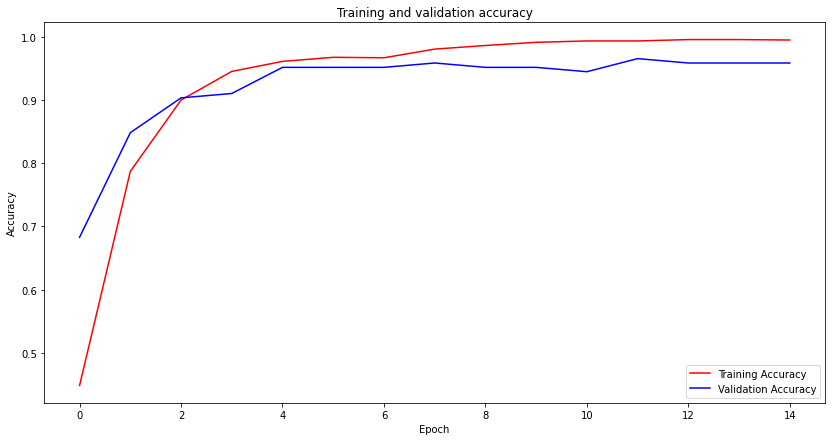

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show

Text(0.5, 1.0, 'Training and validation loss')

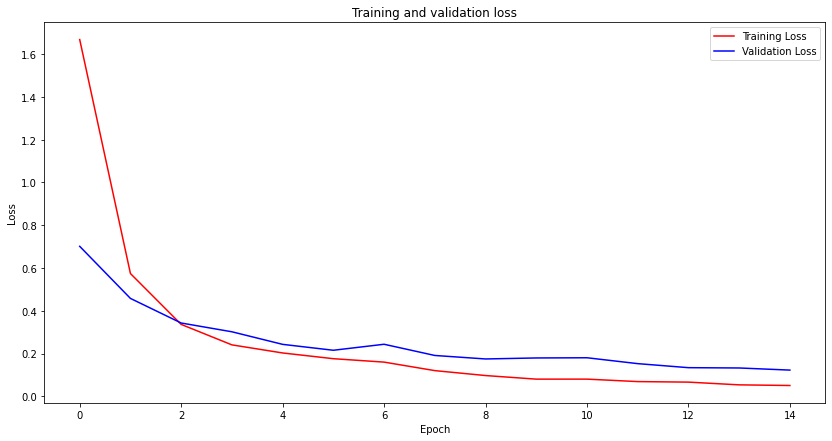

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
## Test Performance on Test Data
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (image_size, image_size))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
#Step 4. Checking performance on Test Data (Out of the sample)

# Read Test Images Dir and their labels
test_images_dir = r'/content/drive/MyDrive/jute_insect_classification/insect_aug_data/random_insect_data/'
test_df = pd.read_csv('/content/drive/MyDrive/jute_insect_classification/insect_aug_data/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/test_preproc_CNN.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

40/40 [==============================] - 17s 414ms/step
[0 0 0 0 0 3 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/jute_insect_classification/insect_aug_data/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
Name: labels, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)



In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[ 9,  0,  0,  1],
       [ 0, 10,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 10]])

In [ ]:
train_dir = '/content/drive/MyDrive/insect_data_all/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

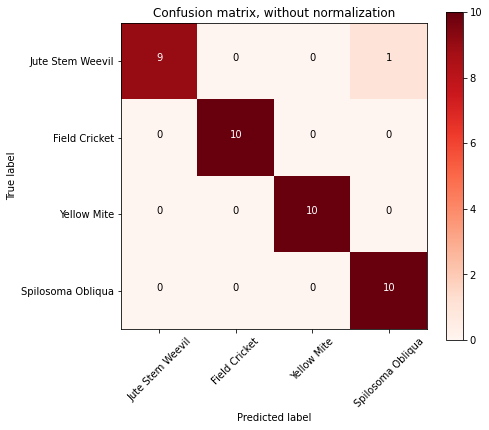

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

**THE END**

In [ ]:
prediction.shape

In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 53s 15s/step - loss: 0.1227 - accuracy: 0.9586


[0.12265230715274811, 0.9586206674575806]

In [23]:
 #Model Prediction

from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"/content/drive/MyDrive/jute_insect_classification/insect_aug_data/random_insect_data/SO_24.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt = model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]and rslt[0][2]and rslt[0][3]:
    prediction="উরচুঙ্গা পোকা_Field Cricket"

if rslt[0][1]>rslt[0][0]and rslt[0][2]and rslt[0][3]:
    prediction="চেলে পোকা_Jute Stem Weevil"

if rslt[0][2]>rslt[0][0]and rslt[0][1]and rslt[0][3]:
    prediction="বিছা পোকা_Spilosoma Obliqua"

else:
    prediction="হলুদ মাকড়_Yellow Mit"
print(prediction)


[[9.0938916e-22 9.9464250e-01 5.3574713e-03 3.4566253e-11]]
বিছা পোকা_Spilosoma Obliqua


In [24]:
keras_file = "/content/drive/MyDrive/jute_insect_classification/jute_insect.h5"
keras.models.save_model(model, keras_file)

In [25]:
tf_model_name = "/content/drive/MyDrive/jute_insect_classification/jute_insect.tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
tflite_model_name = tf_model_name
open(tflite_model_name,"wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7jz7a6qa/assets


80508984

In [ ]:
print(tf.__version__)